# Q14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import random as rn

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

In [2]:
# part a
np.random.seed(1)
x1 = np.random.rand(100)
x2 = 0.5*x1 + np.random.normal(0,1,100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(0,1,100)

Our linear model for regression appears to be of the form y = B0 + B1x1 + B2x2 + e, where the coefficients are <br>
B0 = 2<br>
B1 = 2<br>
B2 = 0.3

In [3]:
# part b
np.corrcoef(x1, x2)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

Text(0.5, 0, 'x1')

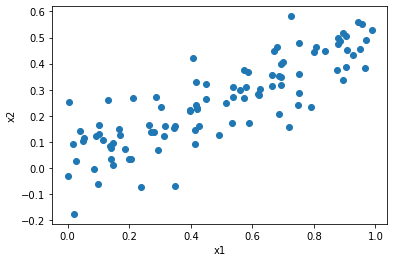

In [4]:
plt.scatter(x1, x2)
plt.ylabel('x2')
plt.xlabel('x1')

In [5]:
# part c
x = np.stack((x1, x2), axis=-1)
X_both = pd.DataFrame(x, columns = ['B1_hat', 'B2_hat'])
Y_both = pd.DataFrame(y, columns = ['Y_hat'])
res_both = sm.OLS(Y_both, sm.add_constant(X_both)).fit()
print(res_both.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_hat   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.40e-07
Time:                        01:06:08   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

In [6]:
res_both.conf_int()

,0,1
const,1.795010,2.583559
B1_hat,-0.559175,1.968432
B2_hat,0.238962,4.765848


Here, the reported estimates of regression coefficients are: <br>
B0_hat : 2.1893 <br>
B1_hat : 0.7046 <br>
B2_hat : 2.5024 <br>
<br>
As we can see that B0_hat is a fairluy good estimate of B0, however B1_hat highly deviates from B1 which is also evident from the high p-value for the same, hence leading us with enough evidence to accept the null hypothesis for B1_hat. While B2_hat is a poor estimate of B2 as well, its confidence intervals barely manages to cover the actual value of B2.

In [7]:
# part d
X1 = pd.DataFrame(x1, columns = ['B1_hat'])
Y_x1 = pd.DataFrame(y, columns = ['Y_hat'])
res_x1 = sm.OLS(Y_x1, sm.add_constant(X1)).fit()
print(res_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_hat   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           6.68e-07
Time:                        01:06:08   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

The value of B1_hat is now closer to B1 and even the std. error for B1_hat has reduced to almost half, which reflects as a neglible p-value for the coefficient hence, we can conviniently reject the null hypothesis for B1_hat in the model

In [8]:
# part e
X2 = pd.DataFrame(x2, columns = ['B2_hat'])
Y_x2 = pd.DataFrame(y, columns = ['Y_hat'])
res_x2 = sm.OLS(Y_x2, sm.add_constant(X2)).fit()
print(res_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_hat   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.09e-07
Time:                        01:06:08   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

The standard error for the coefficient B2_hat has similarly dropped to almost half and consequently even the p-value has become neglible. Hence, we can reject the null hypothesis for B2_hat in the model


part (f) <br>
Yes, the results obtained in (c) to (e) contradict each other as the combined model suggests that the model must drop a variable to make it a better fit. However part (d) and (e) suggest strong relationship between the response and the predictors individually, hence giving evidences to accept the null hypothesis for the other coefficient, even in the case of B2_hat which didn't have sufficient evidence initially but makes the model better when removed.

In [9]:
# part g
x1_new = x1
x2_new = x2
y_new = y
np.append(x1_new, [0.1])
np.append(x2_new, [0.8])
np.append(y_new, [6])
x_new = np.stack((x1_new, x2_new), axis=-1)
X_both_new = pd.DataFrame(x_new, columns = ['B1_hat', 'B2_hat'])
Y_both_new = pd.DataFrame(y_new, columns = ['Y_hat'])
res_both_new = sm.OLS(Y_both_new, sm.add_constant(X_both_new)).fit()
print(res_both_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_hat   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.40e-07
Time:                        01:06:08   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

In [10]:
X1_new = pd.DataFrame(x1_new, columns = ['B1_hat'])
Y_x1_new = pd.DataFrame(y_new, columns = ['Y_hat'])
res_x1_new = sm.OLS(Y_x1_new, sm.add_constant(X1_new)).fit()
print(res_x1_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_hat   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           6.68e-07
Time:                        01:06:08   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

In [11]:
X2_new = pd.DataFrame(x2_new, columns = ['B1_hat'])
Y_x2_new = pd.DataFrame(y_new, columns = ['Y_hat'])
res_x2_new = sm.OLS(Y_x2_new, sm.add_constant(X2_new)).fit()
print(res_x2_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_hat   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.09e-07
Time:                        01:06:08   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0